## SENTIMENT ANALYSIS OF TWEETS POSTED IN 2019 CANADIAN ELECTIONS
### "WHAT PUBLIC OPINION ON TWITTER TELL US ABOUT THE CANADIAN POLITICAL LANDSCAPE IN 2019?

#### 1. Data Cleaning
#### 2. Exploratory Data Analysis
#### 3. Model Preparation
#### 4. Model Implementation
#### 5. Results

Importing all the necessary libraries

In [1]:
# Instaling packages
import pandas as pd
import numpy as np
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec
!pip install missingno
import missingno as msno

try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# importing lib for plots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For evaluating models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
## For building models    
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import svm
from sklearn.svm import LinearSVC

!pip install xgboost
from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB

In [5]:
# Reading the 'csv' file.
df = pd.read_csv("Sentiment.csv")
df2 = pd.read_csv("Canadian_elections_2019.csv")

In [6]:
pd.options.display.max_colwidth = 200 # To display the full text given in the column.
df

,sentiment,text
0,Positive,"RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not @FOXNews moderators.\n#â€¦"
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd"
4,Positive,@salspizza just spotted ur message there Tony and have replied
...,...,...
133806,Positive,"@scottw Nice, I have the 20/20 but to be honest I don't think I really need the 20 up unless you're using my slingbox"
133807,Positive,â€œ@BW_React: #GOPDebate verdict: @JohnKasich wins it. 74.5% positive sentiment. http://t.co/CpqJNwOL11â€
133808,Negative,@amtrack i am sorry .... i love you tho and thats all that matters hahahaha
133809,Positive,@RazorTV http://tinyurl.com/d96txo - Champions League ∩┐╜25 free bet


In [7]:
df2

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ"""
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972"""
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6"""
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave..."
...,...,...,...
2128,Negative,Scandal,"b'You know he was doing a good enough job smearing his own campaign, right @AndrewScheer? #cdnpoli #elxn43 ""Bernier files complaint to elections watchdog over \'professional smear campaign\' again..."
2129,Negative,Scandal,b'You missed the comment. Deflecting the issue does not answer. Best response is like your agent gave when asked if @kinsellawarren was hired by @CPC_HQ . I guess matters are going from bad to wor...
2130,Positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endorses strategic voting\n#elxn43 #elxn2019 #CDNpoli #LPC #NDP #GPC https://t.co/DcnC7PWM6g'
2131,Negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debate...\xf0\x9f\x98\x8f\n#elxn43 #ScheerLies #ScheerHypocrisy https://t.co/88hl2SmgcT'


## 1. Data Cleaning

Checking the number of missing values in the dataframes.

In [8]:
df.isnull().sum()

sentiment     0
text         14
dtype: int64

**missingno (msno)** provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset.

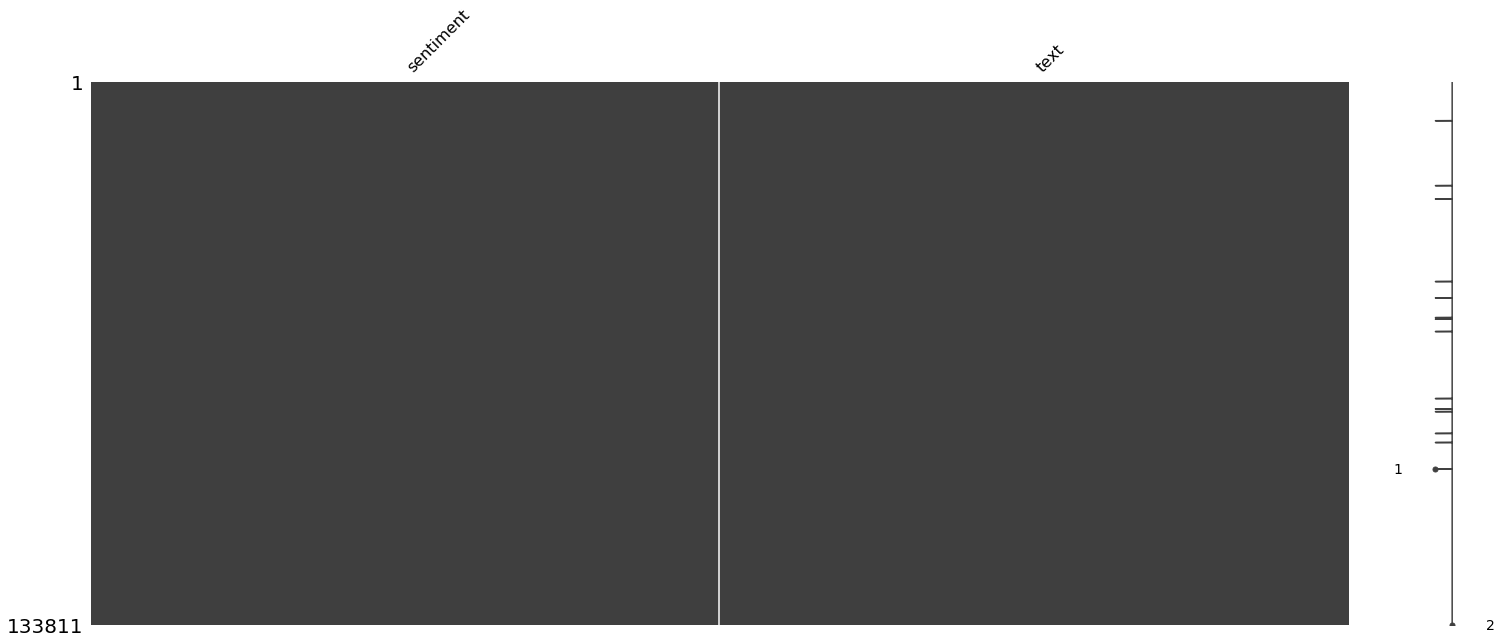

In [9]:
msno.matrix(df)

In [10]:
# Percentage of missing values
print("Percentage of missing values in Sentiments dataframe: %.2f" %(df.isnull().sum()[1]/df.shape[0]*100), "%")

Percentage of missing values in Sentiments dataframe: 0.01 %


In [11]:
df2.isnull().sum()

sentiment             0
negative_reason    1126
text                  0
dtype: int64

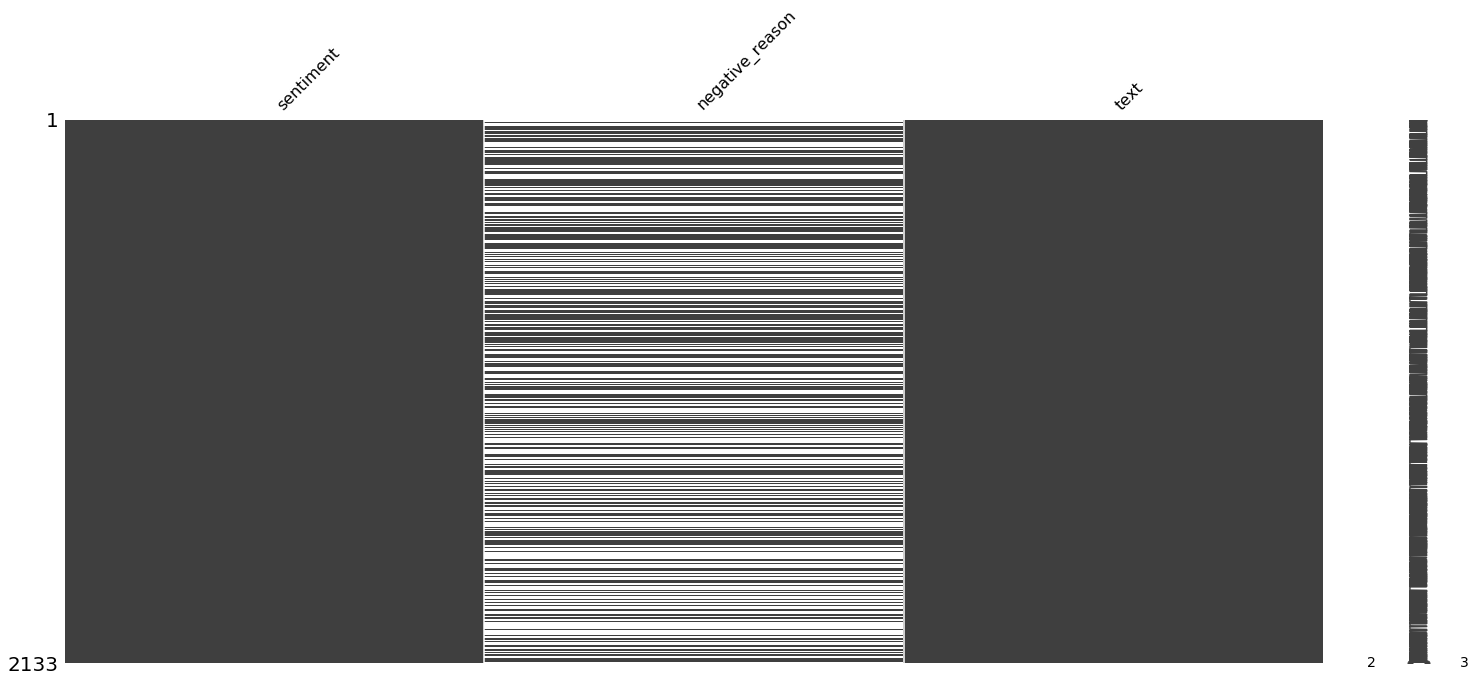

In [12]:
msno.matrix(df2)

In [13]:
# Percentage of missing values
print("Percentage of missing values in Canadian Elections dataframe: %.2f" %(df2.isnull().sum()[1]/df2.shape[0]*100), "%")

Percentage of missing values in Canadian Elections dataframe: 52.79 %


In [14]:
df2['sentiment'].value_counts()

Positive    1127
Negative    1006
Name: sentiment, dtype: int64

In the Canadian Elections datarame (df2), the reason for the particular sentiment is only given for the negative sentiments. The rest of the missing values in the 'negative_reason' column can be imputed as 'Unknown'. 

In [15]:
df2['negative_reason'] = df2['negative_reason'].fillna('Unknown')
df2

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right ..."
1,Positive,Unknown,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ"""
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972"""
3,Positive,Unknown,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6"""
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave..."
...,...,...,...
2128,Negative,Scandal,"b'You know he was doing a good enough job smearing his own campaign, right @AndrewScheer? #cdnpoli #elxn43 ""Bernier files complaint to elections watchdog over \'professional smear campaign\' again..."
2129,Negative,Scandal,b'You missed the comment. Deflecting the issue does not answer. Best response is like your agent gave when asked if @kinsellawarren was hired by @CPC_HQ . I guess matters are going from bad to wor...
2130,Positive,Unknown,b'Your daily reminder:\n@theJagmeetSingh endorses strategic voting\n#elxn43 #elxn2019 #CDNpoli #LPC #NDP #GPC https://t.co/DcnC7PWM6g'
2131,Negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debate...\xf0\x9f\x98\x8f\n#elxn43 #ScheerLies #ScheerHypocrisy https://t.co/88hl2SmgcT'


In [16]:
df2.isna().sum().sum()

0

#### Dropping unwanted data

Here, we will drop the missing data in the sentiments dataframe (df1) as they constitute of only 0.01% of the total data.

In [17]:
df=df.dropna()
df.shape

(133797, 2)

In [18]:
df_sentiments = df.copy() # Sentiments.csv dataframe
df_elections = df2.copy() # Canadian elections 2019 dataframe

Resetting the index of the sentiments dataframe after dropping rows containing null values. 

In [19]:
df_sentiments = df_sentiments.reset_index(drop=True)
# df_sentiments

**Let's remove the twitter handles from the tweets posted in the sentiments dataframe.**

The elections dataframe does not contain such twitter handle mentions in the tweets.

In [20]:
def remove_handles(tweet):
    tweet = " ".join(filter(lambda y:y[0]!='@', tweet.split()))
    return str(tweet)


In [21]:
df_sentiments['Clean_text'] = df_sentiments['text'].apply(lambda x: remove_handles(x)) # Creating a new column for the cleaned text of the tweets.

### Cleaning tweets

#### Steps:
1. All text in lowercase
2. Filter out all stopwords
3. Stemming the words
4. Removal of URL links and twitter handles
5. Removal of special characters

#### Tokenizing - tokenizing involves splitting sentences and words from the body of the text.
#### Stop Words - A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). We would not want these words taking up space in our database, or taking up valuable processing time.
#### Stemming - It is the process of reducing words to their core root.

In [22]:
stop_words = stopwords.words("english")
# remove = r'RT?:|@[A-Za-z0-9]?:\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'
# remove = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" # Removing all the special characters and links
remove = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+|\d+" # Removing all the special characters and links

In [23]:
def preprocess(text, stem=False):
    
    # Remove link,user and special characters     
    text = re.sub(remove, ' ', str(text).lower()).strip() # Converting the srings to lowercase.
    tokens = []
    s1=" "

    for token in text.split(): # Manual tokenizing 
        if token not in stop_words:
            if stem:
                tokens.append(PorterStemmer.stem(token)) # Stemming
            else:
                tokens.append(token)

    return (s1.join(tokens))
    


In [24]:
df_sentiments["Clean_text"] = df_sentiments["Clean_text"].apply(lambda x: preprocess(x))
df_elections["Clean_text"] = df_elections["text"].apply(lambda x: preprocess(x))

In [25]:
# Removing the letter 'b'  from the cleaned text (Elections dataset)
for i in range(df_elections.shape[0]):
    new = df_elections['Clean_text'][i].lstrip('b ')
    df_elections['Clean_text'][i] = new

In [26]:
# Removing the letter 'rt'  from the cleaned text (Sentiment dataset)
for i in range(df_sentiments.shape[0]):
    new = df_sentiments['Clean_text'][i].lstrip('rt ')
    df_sentiments['Clean_text'][i] = new

In [27]:
df_sentiments.head()

,sentiment,text,Clean_text
0,Positive,"RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not @FOXNews moderators.\n#â€¦",ied take amp poll numbers skyrocketed voters matter moderators
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.",damn jealous wanna watch fight love ufc one knows
2,Positive,I'm listening The Beatles now. They're great,listening beatles great
3,Positive,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd",could please get shout anything huge fan wait new cd
4,Positive,@salspizza just spotted ur message there Tony and have replied,spotted ur message tony replied


In [28]:
df_elections.head()

,sentiment,negative_reason,text,Clean_text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right ...",rosiebarton instead suggestion agree canadian women trust andrewscheer conservatives government protect woman right automony body let go cdnpoli elxn canada abortion
1,Positive,Unknown,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ""",allwomanspacewalk real n n etobicokenorth cityofto onpoli cdnpoli elxn
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",rantford going cost billion next years ask justin elxn cdnpoli canada
3,Positive,Unknown,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6""",canada canadaelection canadavotes n elxn n ncan decide help n n
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave...",canada taxpayers sick amp tired hard earned donated corporate welfare bums need one many reasons trudeaumustgo snclavalin leave canada care sheila copps snclavalinscandal election elxn cdnpoli


In [29]:
df_sentiments.isna().sum()

sentiment     0
text          0
Clean_text    0
dtype: int64

In [30]:
df_elections.isna().sum()

sentiment          0
negative_reason    0
text               0
Clean_text         0
dtype: int64

## 2. Exploratory Analysis

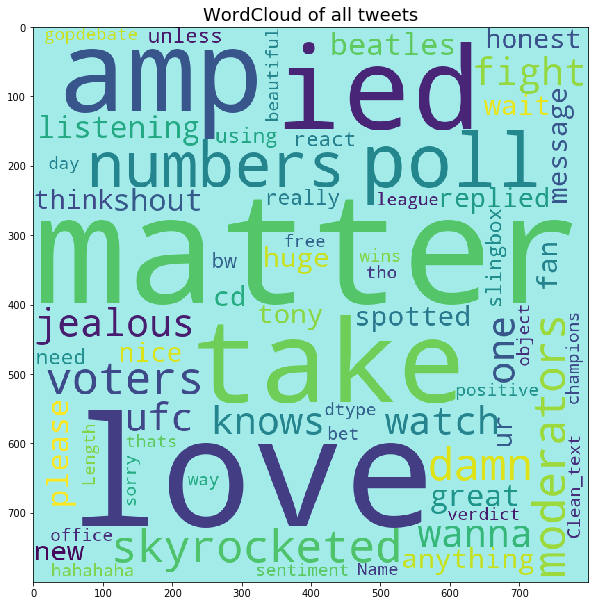

In [31]:
## WordCloud for tweets in Sentiments Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='#a2ebe8', min_font_size = 10).generate(str(df_sentiments['Clean_text']))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("on") 
plt.tight_layout(pad = 0) 
plt.title("WordCloud of all tweets", fontsize=18)  
plt.show()

The above wordcloud represents the most used words in the generic tweets of the sentiments dataframe. 
We can notice that the words with a bigger font size are the ones which were used often while writing the tweets.

Text(0, 0.5, 'Count')

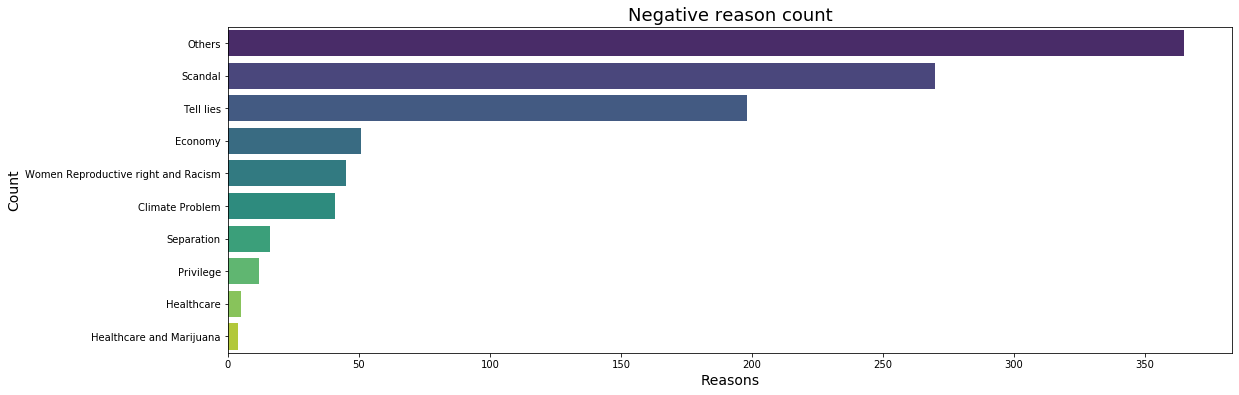

In [32]:
xval = df_elections.drop(df_elections[df_elections["negative_reason"]=='Unknown'].index)

xval = xval['negative_reason'].value_counts().sort_values(ascending=False).reset_index()

plt.figure(figsize=(18,6))
ax = sns.barplot(x=xval['negative_reason'], y=xval['index'], palette='viridis')
plt.title("Negative reason count", fontsize=18)
plt.xlabel("Reasons", fontsize=14)
plt.ylabel("Count", fontsize=14)

The above bar plot describes the number of reasons which were given to the tweets to be negative.
We can see that most of the tweets written about the political parties (apart from 'others') were related to scandals made by the politicians followed by the lies they made by promising earlier and not fulfilling it later. 

**Searching for individual political party related information and assigning names of the party to which the tweet refers.**

We will look for certain keywords in a tweet to classify the tweet with a political party.

1. Liberal : Keywords - 'justin|trudeau|justintrudeau|liberal|lpc'
2. Conservative : Keywords - 'andrew|scheer|andrewscheer|conservative|cpc'
3. NDP : Keywords - 'thejagmeetsingh|ndp|jagmeet|singh|democratic'
4. Mixed: If all or any two of the parties are mentioned
5. None: If neither of the keywords are present

In [33]:
## Creating a column to designate the political party

df_elections['political_party'] = 'None'

In [34]:
        
for i in range(len(df_elections['Clean_text'])):
    
    if ((pd.Series(df_elections['Clean_text'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]) & (pd.Series(df_elections['Clean_text'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0]))| ((pd.Series(df_elections['Clean_text'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]) & (pd.Series(df_elections['Clean_text'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0]))| ((pd.Series(df_elections['Clean_text'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0]) & (pd.Series(df_elections['Clean_text'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0])):
        df_elections['political_party'][i] = 'Mixed'
    
    elif (pd.Series(df_elections['Clean_text'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]):
        df_elections['political_party'][i] = 'Liberal'
        
    elif (pd.Series(df_elections['Clean_text'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0]):
        df_elections['political_party'][i] = 'Conservative'
                    
    elif (pd.Series(df_elections['Clean_text'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0]):
        df_elections['political_party'][i] = 'NDP'  
        
    else:
        df_elections['political_party'][i] = 'None' 

In [35]:
df_elections['political_party'].value_counts()

None            930
Conservative    463
Liberal         303
Mixed           278
NDP             159
Name: political_party, dtype: int64

Text(0, 0.5, 'Political parties')

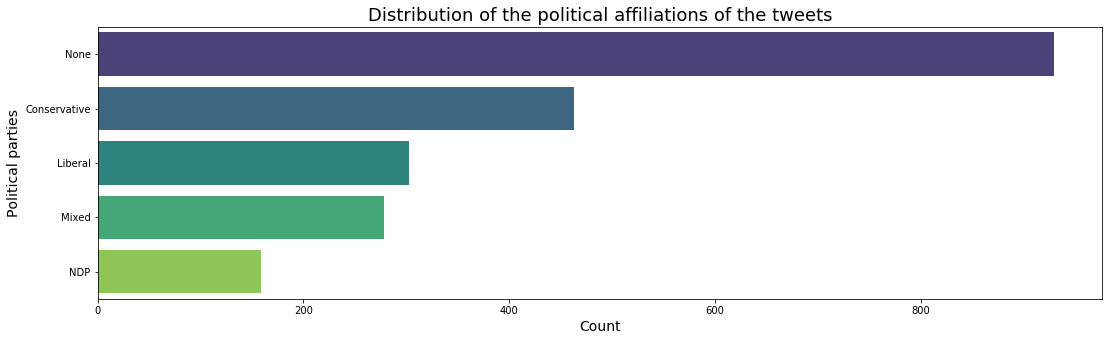

In [36]:
c = df_elections['political_party'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(18,5))
ax=sns.barplot(x=c['political_party'], y=c['index'], palette='viridis')
plt.title("Distribution of the political affiliations of the tweets", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Political parties", fontsize=14)

From the above distribution of tweets, we can see that most of the tweets were related to the Conservative party followed by the Liberals. The maximum number of tweets were related to the elections but did not affiliate any of the political party. NDP had the least number of tweets which means that people were least interested with them. 

In [37]:
Liberal_positive = df_elections[(df_elections['sentiment']=='Positive') & (df_elections['political_party']=='Liberal')]['political_party'].count()
Liberal_negative = df_elections[(df_elections['sentiment']=='Negative') & (df_elections['political_party']=='Liberal')]['political_party'].count()

Conservative_positive = df_elections[(df_elections['sentiment']=='Positive') & (df_elections['political_party']=='Conservative')]['political_party'].count()
Conservative_negative = df_elections[(df_elections['sentiment']=='Negative') & (df_elections['political_party']=='Conservative')]['political_party'].count()

ndp_positive = df_elections[(df_elections['sentiment']=='Positive') & (df_elections['political_party']=='NDP')]['political_party'].count()
ndp_negative = df_elections[(df_elections['sentiment']=='Negative') & (df_elections['political_party']=='NDP')]['political_party'].count()

varied_positive = df_elections[(df_elections['sentiment']=='Positive') & (df_elections['political_party']=='Mixed')]['political_party'].count()
varied_negative = df_elections[(df_elections['sentiment']=='Negative') & (df_elections['political_party']=='Mixed')]['political_party'].count()

none_positive = df_elections[(df_elections['sentiment']=='Positive') & (df_elections['political_party']=='None')]['political_party'].count()
none_negative = df_elections[(df_elections['sentiment']=='Negative') & (df_elections['political_party']=='None')]['political_party'].count()


In [38]:
sent_count = df_elections.groupby('sentiment')['political_party'].agg('count')
sent_count = pd.DataFrame(sent_count)

sent_count['Liberal'] = [Liberal_negative, Liberal_positive]
sent_count['Conservative'] = [Conservative_negative, Conservative_positive]
sent_count['NDP'] = [ndp_negative, ndp_positive]
sent_count['Mixed'] = [varied_negative, varied_positive]
sent_count['None'] = [none_negative, none_positive]
sent_count = sent_count.T
sent_count

sentiment,Negative,Positive
political_party,1006,1127
Liberal,160,143
Conservative,321,142
NDP,47,112
Mixed,158,120
None,320,610


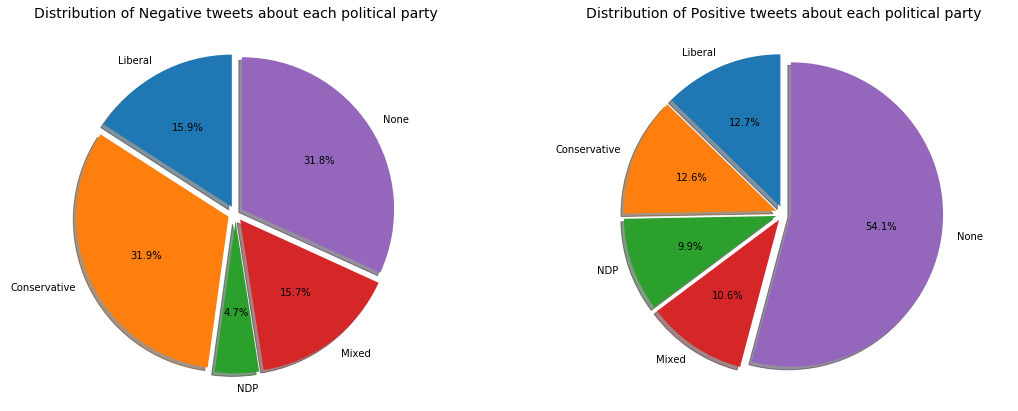

In [39]:
plt.figure(figsize=(18,7))
def distribution_of_tweets(column, n):
    labels = sent_count.drop(["political_party"]).index.to_list()    
    sizes = [(x/sent_count[(column)][1:].to_numpy().sum())*100 for x in sent_count[(column)][1:].to_numpy()]
    explode = (0.05, 0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
    
    plt.subplot(1,2,n)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of {} tweets about each political party'.format(column), fontsize = 14)    
    pie_plot = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    return pie_plot
    
    
distribution_of_tweets('Negative', 1) 
distribution_of_tweets("Positive", 2)

plt.show()

The above pie chart describes the distribution of positive and negative tweets about each political party they represent. 
From the first pie chart, the conservatives had to bear the most as they received the maximum number of negative tweets followed by the Liberals. On the other hand, the Liberals and Conservatives were also favoured the most as they both received almost the same number of positive tweets. 

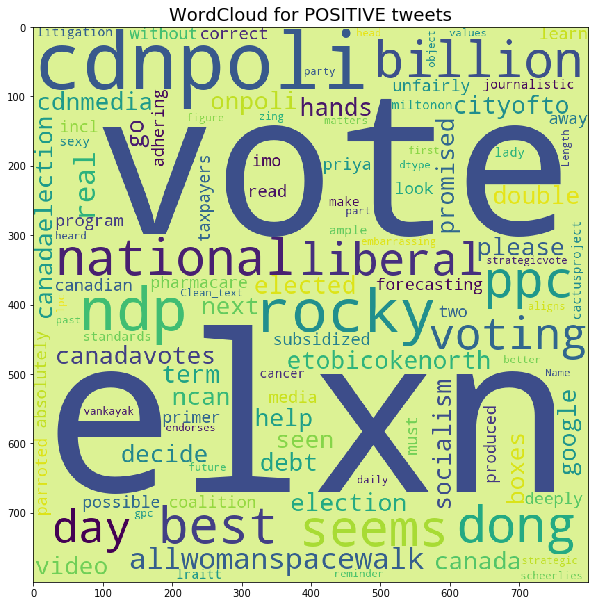

In [40]:
## WordCloud for POSITIVE tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='#dcf294', min_font_size = 10).generate(str(df_elections[df_elections['sentiment']=='Positive']['Clean_text']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("on") 
plt.tight_layout(pad = 0) 
plt.title("WordCloud for POSITIVE tweets", fontsize=18)  
plt.show()

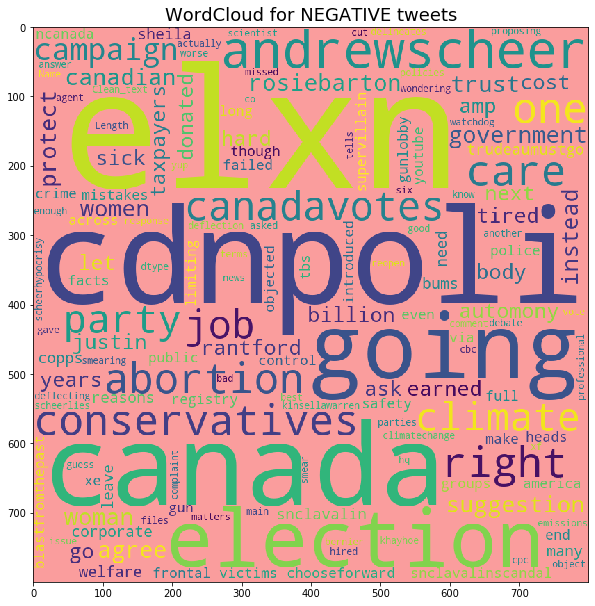

In [41]:
## WordCloud for NEGATIVE tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='#fa9d9d', min_font_size = 10).generate(str(df_elections[df_elections['sentiment']=='Negative']['Clean_text']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("on") 
plt.tight_layout(pad = 0) 
plt.title("WordCloud for NEGATIVE tweets", fontsize=18)  
plt.show()

## 3. Model Preparation

Before applying TF and TF-IDF, we will drop all the neutral sentiments from the sentiments dataframe as we have to predict the sentiments of the Canadian elections dataset which consists of only positive and negative sentiments.

In [42]:
df_sentiments.drop(df_sentiments[df_sentiments['sentiment']=='Neutral'].index, inplace=True)

### 1. TF (Term Frequency)
Term frequency is the number of times a particular word appears in a document. Since every document is different in length, it is possible that a term would appear more often in longer documents than shorter ones. Thus, term frequency is often divided by the total number of terms in the document as a way of normalization.


In [43]:
# CountVectorizer from scikit-learn is used for counting tokens in a collection of text
cv_sentiments_tf = CountVectorizer(max_features=1000)

# We fit our Vectorizer on our cleaned text and create a dataframe for the word frequencies
cv_senti_tf = cv_sentiments_tf.fit_transform(df_sentiments['Clean_text'])

df_sentiments_tf = pd.DataFrame(np.round(cv_senti_tf.toarray(), 4), columns = cv_sentiments_tf.get_feature_names())

# These are the unique tokens in our counted tokens, to be used as labels in our other feature matrices
df_sentiments_tf.head()

,able,absolutely,account,actually,add,afternoon,ago,agree,ah,ahead,...,year,years,yep,yes,yesterday,yet,ying,youtube,yummy,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. TF-IDF
Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

In [44]:
sentiments_tfidf = TfidfVectorizer(use_idf=True, max_features=1000)

cv_senti_tfidf = sentiments_tfidf.fit_transform(df_sentiments['Clean_text'])

df_sentiments_tfidf = pd.DataFrame(np.round(cv_senti_tfidf.toarray(), 4), columns = sentiments_tfidf.get_feature_names())

# These are the unique tokens in our counted tokens, to be used as labels in our other feature matrices
df_sentiments_tfidf.head()

,able,absolutely,account,actually,add,afternoon,ago,agree,ah,ahead,...,year,years,yep,yes,yesterday,yet,ying,youtube,yummy,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now, let's impute the negative sentiment to 0 and the positive sentiment to 1.

In [45]:
sent_encode = {
    'Negative':0,
    'Positive':1
}

df_sentiments.loc[0:,'sentiment_encoded'] = df_sentiments.loc[0:, 'sentiment'].map(sent_encode)
df_sentiments.loc[0:,'sentiment_encoded'] = df_sentiments.loc[0:, 'sentiment_encoded'].astype(int)
df_sentiments['sentiment_encoded'].unique()


array([1, 0], dtype=int64)

In [46]:
df_sentiments

,sentiment,text,Clean_text,sentiment_encoded
0,Positive,"RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not @FOXNews moderators.\n#â€¦",ied take amp poll numbers skyrocketed voters matter moderators,1
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.",damn jealous wanna watch fight love ufc one knows,0
2,Positive,I'm listening The Beatles now. They're great,listening beatles great,1
3,Positive,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd",could please get shout anything huge fan wait new cd,1
4,Positive,@salspizza just spotted ur message there Tony and have replied,spotted ur message tony replied,1
...,...,...,...,...
133792,Positive,"@scottw Nice, I have the 20/20 but to be honest I don't think I really need the 20 up unless you're using my slingbox",nice honest think really need unless using slingbox,1
133793,Positive,â€œ@BW_React: #GOPDebate verdict: @JohnKasich wins it. 74.5% positive sentiment. http://t.co/CpqJNwOL11â€,bw react gopdebate verdict wins positive sentiment,1
133794,Negative,@amtrack i am sorry .... i love you tho and thats all that matters hahahaha,sorry love tho thats matters hahahaha,0
133795,Positive,@RazorTV http://tinyurl.com/d96txo - Champions League ∩┐╜25 free bet,champions league free bet,1


## 4. Model Implementation

In [47]:
y = df_sentiments['sentiment_encoded']

### 1. Logistic Regression


In [48]:
def logistic(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    LR_opt = LogisticRegression(penalty ='l2', max_iter=1000)
    parameters = {'solver':('lbfgs', 'liblinear'), 'C':[0.5, 0.6]} # Parameters to consider.

    LR = GridSearchCV(LR_opt, parameters, cv=10, verbose=True) # Hyperparameter tuning with 10-fold cross-validation.

    LR.fit(X_train, y_train)
    # prob_model = LR.predict_proba(X_test)

    prediction = LR.predict(X_test)
    score = accuracy_score(y_test,prediction)
    print(LR.best_score_, LR.best_params_)# We can also see the best accuracy score and the best performing parameter.
    return LR.best_score_, LR.best_params_ 

In [49]:
logistic_tf = logistic(cv_senti_tf,y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   36.1s finished


0.7380108902447025 {'C': 0.6, 'solver': 'lbfgs'}


In [50]:
logistic_tfidf = logistic(cv_senti_tfidf,y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   28.5s finished


0.7389293446172014 {'C': 0.6, 'solver': 'lbfgs'}


### 2. K-Nearest Neighbour Classifier


In [53]:
def KNN(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    knn_cl_opt =  KNeighborsClassifier()
    parameters = {'n_neighbors':[5, 10]}
    
    K = GridSearchCV(knn_cl_opt, parameters, cv=2, verbose=True)
    K.fit(X_train, y_train)

    prediction = K.predict(X_test)
    score = accuracy_score(y_test,prediction)
    print(K.best_score_, K.best_params_)
    return K.best_score_, K.best_params_

In [54]:
knn_tf = KNN(cv_senti_tf,y)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.3min finished


0.6703295501760371 {'n_neighbors': 10}


In [55]:
knn_tfidf = KNN(cv_senti_tfidf,y)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.2min finished


0.6427431170591966 {'n_neighbors': 10}


### 3. Naive Bayes



In [56]:
def NB(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    nbmn = MultinomialNB()
    nbmn.fit(X_train,y_train)
    
    predictions = nbmn.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("Accuracy of the Naive-Bayes MultinomialNB model is: %0.3f" %(score*100), "%")
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [57]:
nb_tf = NB(cv_senti_tf,y)

Accuracy of the Naive-Bayes MultinomialNB model is: 72.574 %
              precision    recall  f1-score   support

           0       0.73      0.78      0.76     21426
           1       0.71      0.66      0.69     17771

    accuracy                           0.73     39197
   macro avg       0.72      0.72      0.72     39197
weighted avg       0.73      0.73      0.72     39197

[[16712  4714]
 [ 6036 11735]]


In [58]:
nb_tfidf = NB(cv_senti_tfidf,y)

Accuracy of the Naive-Bayes MultinomialNB model is: 72.643 %
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     21426
           1       0.73      0.62      0.67     17771

    accuracy                           0.73     39197
   macro avg       0.73      0.72      0.72     39197
weighted avg       0.73      0.73      0.72     39197

[[17450  3976]
 [ 6747 11024]]


### 4. SVM (Support Vector Machine) - Linear SVC


In [59]:
def LSVC(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    svclinear = LinearSVC()
    parameters = {'max_iter':[1500]}
    svclinear_opt = GridSearchCV(svclinear,parameters, cv=3, verbose=True)
    svclinear_opt.fit(X_train, y_train)

    prediction = svclinear_opt.predict(X_test)
    score = accuracy_score(y_test,prediction)
    print(svclinear_opt.best_score_, svclinear_opt.best_params_)
    return svclinear_opt.best_score_, svclinear_opt.best_params_

In [60]:
svc_tf = LSVC(cv_senti_tf,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.8s finished


0.7347197620765816 {'max_iter': 1500}


In [61]:
svc_tfidf = LSVC(cv_senti_tfidf,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


0.7350805834372062 {'max_iter': 1500}


### 5. Decision Trees


In [62]:
def decisiontree(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    dec =  DecisionTreeClassifier(random_state=1)
    parameters = {'criterion':['gini', 'entropy'], 'max_depth' : [None]}
    
    dec_opt = GridSearchCV(dec, parameters, cv=5, verbose=True)
    dec_opt.fit(X_train, y_train)

    prediction = dec_opt.predict(X_test)
    score = accuracy_score(y_test,prediction)
    print(dec_opt.best_score_, dec_opt.best_params_)
    return dec_opt.best_score_, dec_opt.best_params_

In [63]:
dec_tf = decisiontree(cv_senti_tf,y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.4min finished


0.6800279909904 {'criterion': 'entropy', 'max_depth': None}


In [64]:
dec_tfidf = decisiontree(cv_senti_tfidf,y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.0min finished


0.6798093113779002 {'criterion': 'gini', 'max_depth': None}


### 6. Random Forest


In [65]:
def random_forest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    rf =  RandomForestClassifier(n_estimators=100)
    parameters = {'max_depth': [None]}
    
    rf_opt = GridSearchCV(rf, parameters, cv=5, verbose=True)
    rf_opt.fit(X_train, y_train)

    prediction = rf_opt.predict(X_test)
    score = accuracy_score(y_test,prediction)
    print(rf_opt.best_score_, rf_opt.best_params_)
    return rf_opt.best_score_, rf_opt.best_params_

In [66]:
rf_tf = random_forest(cv_senti_tf,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 16.7min finished


0.7176955542434779 {'max_depth': None}


In [67]:
rf_tfidf = random_forest(cv_senti_tfidf,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.4min finished


0.7302368300203372 {'max_depth': None}


### 7. XGBoost


In [68]:
def xgbclassifier(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    xgb = XGBClassifier()
    parameters = {'learning_rate':[0.1, 1, 1.5]}
    xgb_opt = GridSearchCV(xgb, parameters, cv=5, verbose=True)
    xgb_opt.fit(X_train, y_train)
    
    prediction = xgb_opt.predict(X_test)
    score = accuracy_score(y_test,prediction)
    print(xgb_opt.best_score_, xgb_opt.best_params_)
    return xgb_opt.best_score_, xgb_opt.best_params_

In [69]:
xgb_tf = xgbclassifier(cv_senti_tf,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.4min finished


0.7346650921734567 {'learning_rate': 1}


In [70]:
xgb_tfidf = xgbclassifier(cv_senti_tfidf,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.6min finished


0.7257320300028428 {'learning_rate': 1}


### Comparison of accuracies accross different models

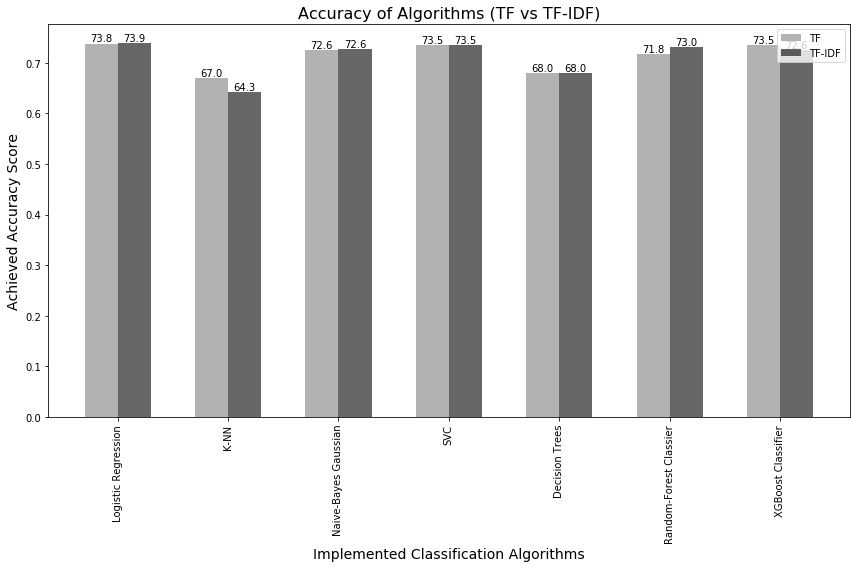

In [71]:
x_axis = ['Logistic Regression', 'K-NN', 'Naive-Bayes Gaussian', 'SVC', 'Decision Trees', 'Random-Forest Classier', 'XGBoost Classifier']
y_tf = [logistic_tf[0], knn_tf[0], nb_tf, svc_tf[0], dec_tf[0], rf_tf[0], xgb_tf[0]]
y_tfidf = [logistic_tfidf[0], knn_tfidf[0], nb_tfidf, svc_tfidf[0], dec_tfidf[0], rf_tfidf[0], xgb_tfidf[0]]

# create plot
fig, ax = plt.subplots(figsize=(12,8))

rects1 = ax.bar(np.arange(7), y_tf, 0.3, alpha=0.6,color='grey', label='TF')

rects2 = ax.bar(np.arange(7) + 0.3, y_tfidf, 0.3, alpha=0.6, color='black', label='TF-IDF')

plt.xlabel('Implemented Classification Algorithms', fontsize = 14)
plt.ylabel('Achieved Accuracy Score', fontsize = 14)
plt.title('Accuracy of Algorithms (TF vs TF-IDF)', fontsize = 16)
plt.xticks(np.arange(7) + 0.3/2, (x_axis), rotation = 90,  fontsize = 10)
plt.legend((rects1[0], rects2[0]), ('TF', 'TF-IDF'))

rects = ax.patches

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, "%0.1f" %(height*100), ha='center', va='bottom')

        
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

#### From the above bar chart, we can see that the Logistic regression and SVC model have the highest accuracy on the test set for both word frequency (TF) and TF-IDF as features. Hence we will go with the features provided by TF-IDF and implement Logistic regression on the Canadian Elections data set.



**Let's compute *TF-IDF* on the canadian elections dataset.**

In [72]:
# Fitting the elections data into the same TF-IDF model generated before.
cv_elec_tfidf = sentiments_tfidf.fit_transform(df_elections['Clean_text'])

df_elections_tfidf = pd.DataFrame(np.round(cv_elec_tfidf.toarray(), 4), columns = sentiments_tfidf.get_feature_names())

# These are the unique tokens in our counted tokens, to be used as labels in our other feature matrices
df_elections_tfidf.head()

,ab,abc,able,ableg,abortion,abpoli,accept,access,account,accountable,...,years,yeg,yes,yesterday,yet,york,young,youth,yr,yyc
0,0.0,0.0,0.0,0.0,0.2762,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.3284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Encoding the sentiment values

In [73]:
sent_encode = {
    'Negative':0,
    'Positive':1
}

df_elections.loc[0:,'sentiment_encoded'] = df_elections.loc[0:, 'sentiment'].map(sent_encode)
df_elections.loc[0:,'sentiment_encoded'] = df_elections.loc[0:, 'sentiment_encoded'].astype(int)
df_elections['sentiment_encoded'].unique()


array([0, 1], dtype=int64)

In [74]:
y_test_elec = df_elections['sentiment_encoded']

**Now, let's predict the sentiments of our elections tweets using the Logistic Regression model.**

**LOGISTIC REGRESSION -** 

**Logistic regression is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable.**

**Sigmoid Function**

**The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.**

Pros:

- Convenient probability scores for observations
- Efficient implementations available across tools
- Multi-collinearity is not really an issue and can be countered with L2 regularization to an extent
- Wide spread industry comfort for logistic regression solutions

Cons:

- Doesn’t perform well when feature space is too large
- Doesn’t handle large number of categorical features/variables well
- Relies on transformations for non-linear features
- Relies on entire data

In [75]:
def logreg_elections(x1,y1,x2,y2):
    
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42, stratify=y1)
    
    model = LogisticRegression(solver='lbfgs', C=0.6) # Using the tuned hyperparameters from the previous model
    model.fit(X_train,y_train)
    
    predictions = model.predict(x2)
    
    score = accuracy_score(y2,predictions)

    print ("Accuracy of the Logistic Regression model applied on the Canadian Elections tweets dataset is: %0.3f" %(score*100), "%")
    
    print(classification_report(y2,predictions))
    
    print (confusion_matrix(y2,predictions))
    
    return predictions, score

In [76]:
predictions, score = logreg_elections(cv_senti_tfidf, y, cv_elec_tfidf, y_test_elec)

Accuracy of the Logistic Regression model applied on the Canadian Elections tweets dataset is: 47.679 %
              precision    recall  f1-score   support

           0       0.46      0.67      0.55      1006
           1       0.51      0.31      0.38      1127

    accuracy                           0.48      2133
   macro avg       0.49      0.49      0.46      2133
weighted avg       0.49      0.48      0.46      2133

[[670 336]
 [780 347]]


#### Accuracy on the election dataset is 47.679% from the best model. This means more than half of the predictions were incorrectly predicted.

Let's check the predictions for each political party and create a column that states whether the prediction made was correct or incorrect.

In [77]:
df_elections_pred = df_elections.copy()

In [78]:
df_elections_pred['predictions'] = predictions
df_elections_pred['Result'] = '0'

for i in range(len(df_elections_pred['Result'])):
    if df_elections_pred['sentiment_encoded'][i]==df_elections_pred['predictions'][i]:
        df_elections_pred['Result'][i]='truly_predicted'
    else:
        df_elections_pred['Result'][i]='falsely_predicted'

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df_elections_pred.head()

,sentiment,negative_reason,text,Clean_text,political_party,sentiment_encoded,predictions,Result
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right ...",rosiebarton instead suggestion agree canadian women trust andrewscheer conservatives government protect woman right automony body let go cdnpoli elxn canada abortion,Conservative,0,0,truly_predicted
1,Positive,Unknown,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ""",allwomanspacewalk real n n etobicokenorth cityofto onpoli cdnpoli elxn,None,1,1,truly_predicted
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",rantford going cost billion next years ask justin elxn cdnpoli canada,Liberal,0,0,truly_predicted
3,Positive,Unknown,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6""",canada canadaelection canadavotes n elxn n ncan decide help n n,None,1,0,falsely_predicted
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave...",canada taxpayers sick amp tired hard earned donated corporate welfare bums need one many reasons trudeaumustgo snclavalin leave canada care sheila copps snclavalinscandal election elxn cdnpoli,Liberal,0,1,falsely_predicted


**Plotting the predictions of each party**

Text(0, 0.5, 'Count')

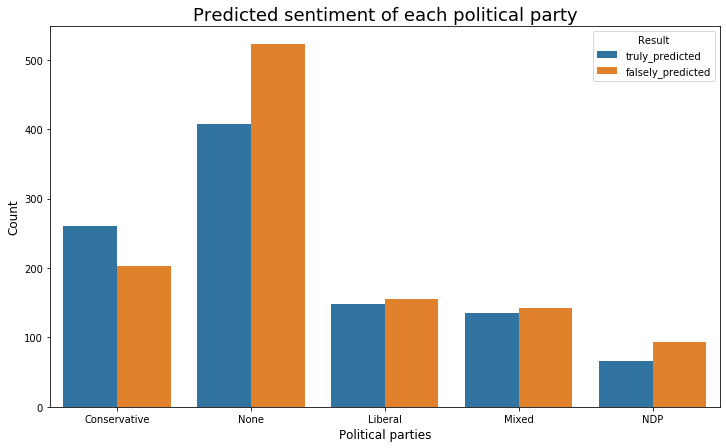

In [80]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", hue='Result', data=df_elections_pred)
ax.set_title('Predicted sentiment of each political party', fontsize=18)
ax.set_xlabel('Political parties', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

Now let's see the count of positive and negative tweets which were predicted correctly.

Text(0, 0.5, 'Count')

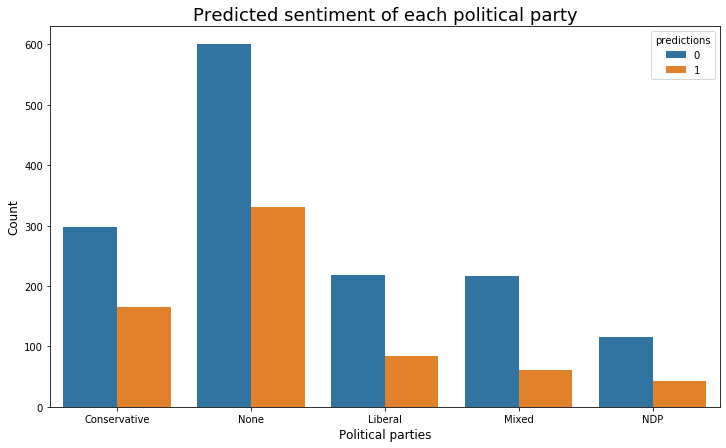

In [81]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", hue='predictions', data=df_elections_pred)
ax.set_title('Predicted sentiment of each political party', fontsize=18)
ax.set_xlabel('Political parties', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

In [82]:
xyz = df_elections_pred['predictions'].groupby(df_elections_pred['political_party']).value_counts()
print(xyz, "\n0 = NEGATIVE, 1 = POSITIVE")

political_party  predictions
Conservative     0              298
                 1              165
Liberal          0              219
                 1               84
Mixed            0              217
                 1               61
NDP              0              116
                 1               43
None             0              600
                 1              330
Name: predictions, dtype: int64 
0 = NEGATIVE, 1 = POSITIVE


In [83]:
# c = 133
# l = 135
sent_count # original count

sentiment,Negative,Positive
political_party,1006,1127
Liberal,160,143
Conservative,321,142
NDP,47,112
Mixed,158,120
None,320,610


**The above given bar plot describes the sentiments predicted by our classification model. The 2 tables shown next are the true and predicted sentiment values grouped according to each political party.**

**From the predictions table, we can see that the positive to negative sentiment ratio is almost the same. The difference in sentiments count for the Conservative party is 133, while it is 135 for the Liberals. The difference is very high for the rest of the parties. Hence, we can say that both Conservatives and Liberals had an equal chance of winning the 2019 Canadian elections as both of them received the same ratio of positive tweets.**

**From the original sentiments dataset (table 2), we can see that Liberals received a higher ratio of positive tweets when compared to the rest of the parties. This proves that the result should be in their favour and in fact, they even won the elections.**

**As the accuracy of our model is only around 48%, our assumption that the Liberals and the Conservations have an almost equal chance of winning also holds true.**

**This shows that NLP analytics of tweets can be reliable. As tweets play the role of voice of the general public, it can be useful for political parties to perform NLP on the tweets to know where they stand and how they can improve their political campaigns in order to turn the result towards their favour.**



## Implementing 3 models on the elections dataset using only the negative reason data. 

In [84]:
df_elections_neg = df_elections_pred[df_elections['sentiment']=='Negative']
# df_elections_neg

In [85]:
# Finding the count of each negative reason

df_elections_neg.groupby(['negative_reason'])['negative_reason'].count()

negative_reason
Climate Problem                         41
Economy                                 51
Healthcare                               5
Healthcare and Marijuana                 4
Others                                 364
Privilege                               12
Scandal                                270
Separation                              16
Tell lies                              198
Women Reproductive right and Racism     45
Name: negative_reason, dtype: int64

#### Combining some of the reasons together. 

1. Economy + Privilege = Economy (both Economy and Privilege Tweets talk about the economy (and policies) of the country)
2. Healthcare + Healthcare and Marijuana + Women Reproductive right and Racism = Healthcare (All of these classes come under a single umbrella of Healthcare)
3. Tell Lies + Separation = Manipulative (these classes represent manipulative tweets, so renames them as Manipulative)

In [86]:
df_elections_neg=df_elections_neg.reset_index()
df_elections_neg['grouped_reasons'] = '0'

for i in range(len(df_elections_neg['negative_reason'])):
    if (df_elections_neg['negative_reason'][i]=='Climate Problem'):
        df_elections_neg['grouped_reasons'][i] = 'Climate Problem'
    elif (df_elections_neg['negative_reason'][i]=='Economy') | (df_elections_neg['negative_reason'][i]=='Privilege') :
        df_elections_neg['grouped_reasons'][i] = 'Economy'
    elif (df_elections_neg['negative_reason'][i]=='Healthcare') | (df_elections_neg['negative_reason'][i]=='Healthcare and Marijuana') | (df_elections_neg['negative_reason'][i]=='Women Reproductive right and Racism') :
        df_elections_neg['grouped_reasons'][i] = 'Healthcare'
    elif df_elections_neg['negative_reason'][i]=='Scandal' :
        df_elections_neg['grouped_reasons'][i] = 'Scandalous'
    elif (df_elections_neg['negative_reason'][i]=='Tell lies') | (df_elections_neg['negative_reason'][i]=='Separation') :
        df_elections_neg['grouped_reasons'][i] = 'Manipulative'
    elif df_elections_neg['negative_reason'][i]=='Others':
        df_elections_neg['grouped_reasons'][i] = 'Others'

df_elections_neg


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is tryi

,index,sentiment,negative_reason,text,Clean_text,political_party,sentiment_encoded,predictions,Result,grouped_reasons
0,0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right ...",rosiebarton instead suggestion agree canadian women trust andrewscheer conservatives government protect woman right automony body let go cdnpoli elxn canada abortion,Conservative,0,0,truly_predicted,Healthcare
1,2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",rantford going cost billion next years ask justin elxn cdnpoli canada,Liberal,0,0,truly_predicted,Economy
2,4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave...",canada taxpayers sick amp tired hard earned donated corporate welfare bums need one many reasons trudeaumustgo snclavalin leave canada care sheila copps snclavalinscandal election elxn cdnpoli,Liberal,0,1,falsely_predicted,Economy
3,5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - #BlastFromThePast - In 2012 #Conservatives introduced the end of the long-gun registry even though all heads of police across Canada and victims' grou...",canadavotes elxn cdnpoli facts blastfromthepast conservatives introduced end long gun registry even though heads police across canada victims groups objected crime control public safety gunlobby,Conservative,0,1,falsely_predicted,Others
4,8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don't Make America's Mistakes | Full Frontal on TBS https://t.co/PhU4jHxnMF via @YouTube""",chooseforward cdnpoli elxn ncanada make america mistakes full frontal tbs via youtube,None,0,0,truly_predicted,Others
...,...,...,...,...,...,...,...,...,...,...
1001,2125,Negative,Others,b'You can\xe2\x80\x99t be a supervillain of an election if you failed at all your jobs \n\n#elxn43 https://t.co/cBjE4yZSTX',xe x x supervillain election failed jobs n n elxn,None,0,0,truly_predicted,Others
1002,2126,Negative,Climate Problem,b'You care about limiting #ClimateChange and are wondering which party to vote for in #elxn43? Climate scientist @KHayhoe delineates what the six main parties are proposing in terms of climate pol...,care limiting climatechange wondering party vote elxn climate scientist khayhoe delineates six main parties proposing terms climate policies tells ones actually cut co emissions,None,0,0,truly_predicted,Climate Problem
1003,2128,Negative,Scandal,"b'You know he was doing a good enough job smearing his own campaign, right @AndrewScheer? #cdnpoli #elxn43 ""Bernier files complaint to elections watchdog over \'professional smear campaign\' again...",know good enough job smearing campaign right andrewscheer cdnpoli elxn bernier files complaint elections watchdog professional smear campaign party cbc news,Conservative,0,0,truly_predicted,Scandalous
1004,2129,Negative,Scandal,b'You missed the comment. Deflecting the issue does not answer. Best response is like your agent gave when asked if @kinsellawarren was hired by @CPC_HQ . I guess matters are going from bad to wor...,missed comment deflecting issue answer best response like agent gave asked kinsellawarren hired cpc hq guess matters going bad worse another deflection cdnpoli elxn elxn canadavotes,Conservative,0,0,truly_predicted,Scandalous


In [87]:
df_elections_neg=df_elections_neg.drop(columns='index')

In [88]:
df_elections_neg.groupby(['grouped_reasons'])['grouped_reasons'].count()

grouped_reasons
Climate Problem     41
Economy             63
Healthcare          54
Manipulative       214
Others             364
Scandalous         270
Name: grouped_reasons, dtype: int64

#### Implementing TF-IDF on the cleaned text of the negative tweets.

In [89]:
elec_neg_tfidf = TfidfVectorizer(use_idf=True)

df_elections_neg_tfidf = elec_neg_tfidf.fit_transform(df_elections_neg['Clean_text'])

df_elec_neg_tfidf = pd.DataFrame(np.round(df_elections_neg_tfidf.toarray(), 4), columns = elec_neg_tfidf.get_feature_names())

# These are the unique tokens in our counted tokens, to be used as labels in our other feature matrices
df_elec_neg_tfidf.head()

,aa,aarongunn,aartipole,ab,abblib,abc,abdaniellesmith,abed,abiding,abigailbimman,...,yvan,yvr,yvrre,yyc,yyj,yyz,zero,zerocredibility,zitaastravas,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Assigning the target variable as the classes of grouped reasons.
y_ele_neg = df_elections_neg['grouped_reasons']

### Implementing Logistic Regression, Decision Tree and Random Forest Classifier models

In [91]:
logistic(df_elections_neg_tfidf, y_ele_neg)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

D

0.42613636363636365 {'C': 0.6, 'solver': 'lbfgs'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.3s finished
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



(0.42613636363636365, {'C': 0.6, 'solver': 'lbfgs'})

The metrics of 'Climate change', 'Economy' and 'Healthcare' are not defined properly due to the presence of very few samples in each class as compared to the rest of the reasons. 

In [92]:
decisiontree(df_elections_neg_tfidf, y_ele_neg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.45454545454545453 {'criterion': 'gini', 'max_depth': None}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



(0.45454545454545453, {'criterion': 'gini', 'max_depth': None})

In [120]:
random_forest(df_elections_neg_tfidf, y_ele_neg)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


0.48295454545454547 {'max_depth': None}


(0.48295454545454547, {'max_depth': None})

#### The best accuracy achieved is 48.29% by the Random Forest Classifier.

## 5. Results

##### *Some results and explanations are already given above*

Describe the results of the analysis and discuss your interpretation of the results - Explained above

#### Explain how each party is viewed in the public eye based on the sentiment value.

Text(0.5, 1.0, 'Distribution of reasons of negative tweets')

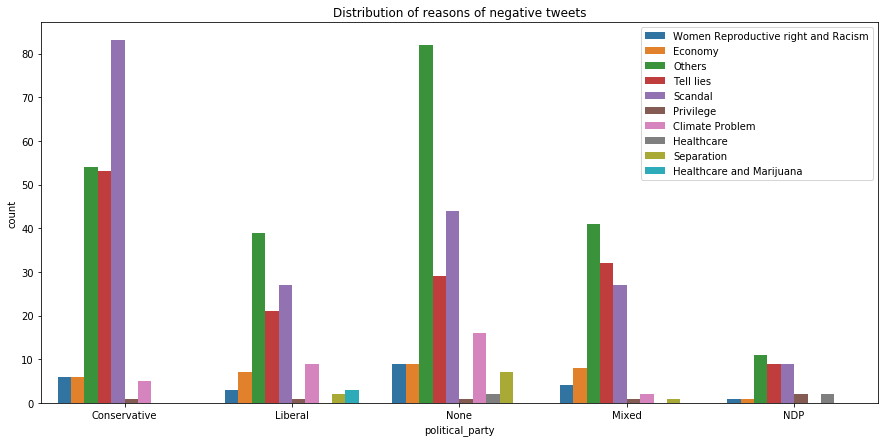

In [121]:
## Distribution of negative tweets in correct predictions
true_neg = df_elections_pred[(df_elections_pred['Result']=='truly_predicted') & (df_elections_pred['sentiment']=='Negative')]

plt.figure(figsize=(15,7))
ax = sns.countplot(x="political_party", data=true_neg, hue='negative_reason')
plt.legend(loc='upper right')
plt.title("Distribution of reasons of negative tweets")

**This is substantiated from the above graph that most of the negative tweets of the Conservative party are categorized as 'Scandal' and 'Tell Lies' whereas most of the negative tweets for the rest of the parties are in 'Others' category.**

**This shows that the public associated the Conservative party with deceit, scandalous and lies in their tweets. The same can be said for Liberal party but it is not to the same extent as that of the Conservative party.**

#### Q. For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons.


In [95]:
df_elections_neg.groupby(['grouped_reasons'])['grouped_reasons'].count()

grouped_reasons
Climate Problem     41
Economy             63
Healthcare          54
Manipulative       214
Others             364
Scandalous         270
Name: grouped_reasons, dtype: int64

#### It can be inferred that the count of reasons is disproportionate. Half of the reasons have very less samples as compared to the rest. Hence the data is skewed which means our model has very few tweets of 'Climate Problem', 'Economy' and 'Healthcare' to model on. Therefore, as we got few samples per class to build our model, we obtain a low accuracy in our model.

#### Q. Suggest one way you can improve the accuracy of your models.

1. Obtain more samples of reasons which have a low count.
2. Increase the number of max_features of our TF-IDF vectorizer.
3. Tune the hyperparameters of the model.

## Bonus 

### 1. Word Embeddings
**A word embedding is a learned representation for text where words that have the same meaning have a similar representation. Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning.**

**Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.**

In [96]:
size=100 # Defining the size of vector of each word (100x1 size vector in this case)

tokenized_sentences = [sentence.split() for sentence in df_sentiments['Clean_text']] # tokenizing each word from the general dataset corpus
model_word2vec = word2vec.Word2Vec(tokenized_sentences, size=size, min_count=1) # building word2vec model from tokenized words

In [97]:
# Add and average out all vectorized words together from a particular tweet
def buildWordVector(text, size):
    
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    if text == '':
        return vec
    else:
        text = text.split(' ')
        for word in text:
            vec += model_word2vec[word].reshape((1, size))
            count += 1.
    if count != 0:
        vec /= count
    return vec

In [98]:
## Building an array of averaged out vectors of all tweets and storing it as an array
array_wordEmbedding = np.concatenate([buildWordVector(z, size) for z in df_sentiments['Clean_text']])

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



Implementing word embedding as features in Logostic regression, Decision Trees and Random forest classifier.

In [99]:
logistic(array_wordEmbedding,y), decisiontree(array_wordEmbedding,y), random_forest(array_wordEmbedding,y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.4min finished


0.7148199173391064 {'C': 0.6, 'solver': 'lbfgs'}
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.2min finished


0.6302893131273372 {'criterion': 'entropy', 'max_depth': None}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.6min finished


0.713595311509108 {'max_depth': None}


((0.7148199173391064, {'C': 0.6, 'solver': 'lbfgs'}),
 (0.6302893131273372, {'criterion': 'entropy', 'max_depth': None}),
 (0.713595311509108, {'max_depth': None}))

#### There is no improvement in accuracies from word embeddings except for Decision Trees where we see an improvement in accuracy of around 6%. 

### 2. N-grams

**An N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. It can also be defined as a contiguous sequence of N items from a given sample of text or speech. Here an item can be a character, a word or a sentence and N can be any integer. When N is 2, we call the sequence a bigram. Similarly, a sequence of 3 items is called a trigram, and so on.**

**Applying N-grams to  TF-IDF Vectorizer.**

In [100]:
## Initializing with a Tri-gram in TF-IDF
vectorizer_TFIDF_sent = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=4500, ngram_range=(1,3)) # Tri-grams
array_TFIDF_sent = vectorizer_TFIDF_sent.fit_transform(df_sentiments['Clean_text'])


In [101]:
logistic(array_TFIDF_sent,y), decisiontree(array_TFIDF_sent,y), random_forest(array_TFIDF_sent,y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.6min finished


0.7579435369240526 {'C': 0.5, 'solver': 'liblinear'}
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.0min finished


0.697642633777253 {'criterion': 'entropy', 'max_depth': None}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.3min finished


0.7386450611209517 {'max_depth': None}


((0.7579435369240526, {'C': 0.5, 'solver': 'liblinear'}),
 (0.697642633777253, {'criterion': 'entropy', 'max_depth': None}),
 (0.7386450611209517, {'max_depth': None}))

**Using Uni and Tri-grams (ngram_range=(1,3)), we can see that the accuracies of all the models have increased by a significant amount.**
